## Part 1: K-means Clustering 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import scipy.io as sio
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [ ]:
data = sio.loadmat('/content/drive/Shareddrives/COGS 118B Final Project/olivettifaces.mat')
faces = data['faces']
print(faces.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(4096, 400)


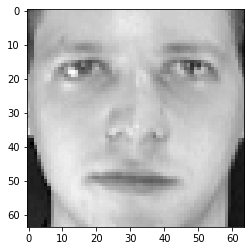

In [ ]:
# viewcolumn(columnvector);
# VIEWCOLUMN Displays a 60 x 60 grayscale image stored in a column vector.
# Tim Marks 2002

def viewcolumn(columnvector):
    plt.imshow(columnvector.reshape([64, 64], order='F'), cmap=plt.get_cmap('gray'))

viewcolumn(faces[:,0])

In [ ]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [ ]:
def calcSqDistances(X, Kmus):
    N, K = X.shape[0], Kmus.shape[0]
    sqDist = np.zeros((N, K))
    
    for i in range(N):
        for j in range(K):
            # squared distance from the ith data vector to the jth kmu vector
            sqDist[i, j] = np.linalg.norm(X[i]-Kmus[j])
    return sqDist

In [ ]:
def determineRnk(sqDmat):
    # rank of a matrix is linearly indep rows or cols in matrix
    Rnk = np.zeros((sqDmat.shape))
    for i, val in enumerate(sqDmat):
        m = np.argmin(val)
        Rnk[i, m] = 1
    return Rnk

In [ ]:
def recalcMus(X, Rnk):
    # recalculate mu vectors based on cluser assignments using eq. 9.4
    num = X.T.dot(Rnk)
    den = np.sum(Rnk, axis=0)
    Mus = (np.divide(num, den)).T
    return Mus

In [ ]:
def runKMeans(K,X):
    N = 400
    D = 4096

    #allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    #initialize cluster centers by randomly picking points from the data
    rand_inds = np.random.permutation(N)
    Kmus = X[rand_inds[0:K],:]

    #specify the maximum number of iterations to allow
    maxiters = 5000

    for iter in range(maxiters):
        #assign each data vector to closest mu vector as per Bishop (9.2)
        #do this by first calculating a squared distance matrix where the n,k entry
        #contains the squared distance from the nth data vector to the kth mu vector
        print(iter, end= '\r', flush = True)
        #sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus)

        #given the matrix of squared distances, determine the closest cluster
        #center for each data vector

        #R is the "responsibility" matrix
        #R will be an N-by-K matrix of binary values whose n,k entry is set as
        #per Bishop (9.2)
        #Specifically, the n,k entry is 1 if point n is closest to cluster k,
        #and is 0 otherwise
        Rnk = determineRnk(sqDmat)

        KmusOld = Kmus
        #recalculate mu values based on cluster assignments as per Bishop (9.4)
        Kmus = recalcMus(X, Rnk)


        #check to see if the cluster centers have converged.  If so, break.
        if np.sum(np.abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break

        return Kmus

In [ ]:
Kmus_40 = runKMeans(40,faces.T)
#print(Kmus_10)

In [ ]:
def get_cluster_plot(Kmus): 
    '''
    : get a plot of what different clusters represent
    : takes as input the cluster location matrix
    '''
    row = len(Kmus) // 5
    fig,axs = plt.subplots(row,5, figsize = (20,20))
    for i in range(len(Kmus)):
        cluster = (Kmus[i].T).reshape(64,64) #*255
        axs[i//5][i%5].imshow(cluster.T, cmap=plt.get_cmap('gray'))
        axs[i//5][i%5].set_title(f'Cluster {i + 1}')
        plt.tight_layout()

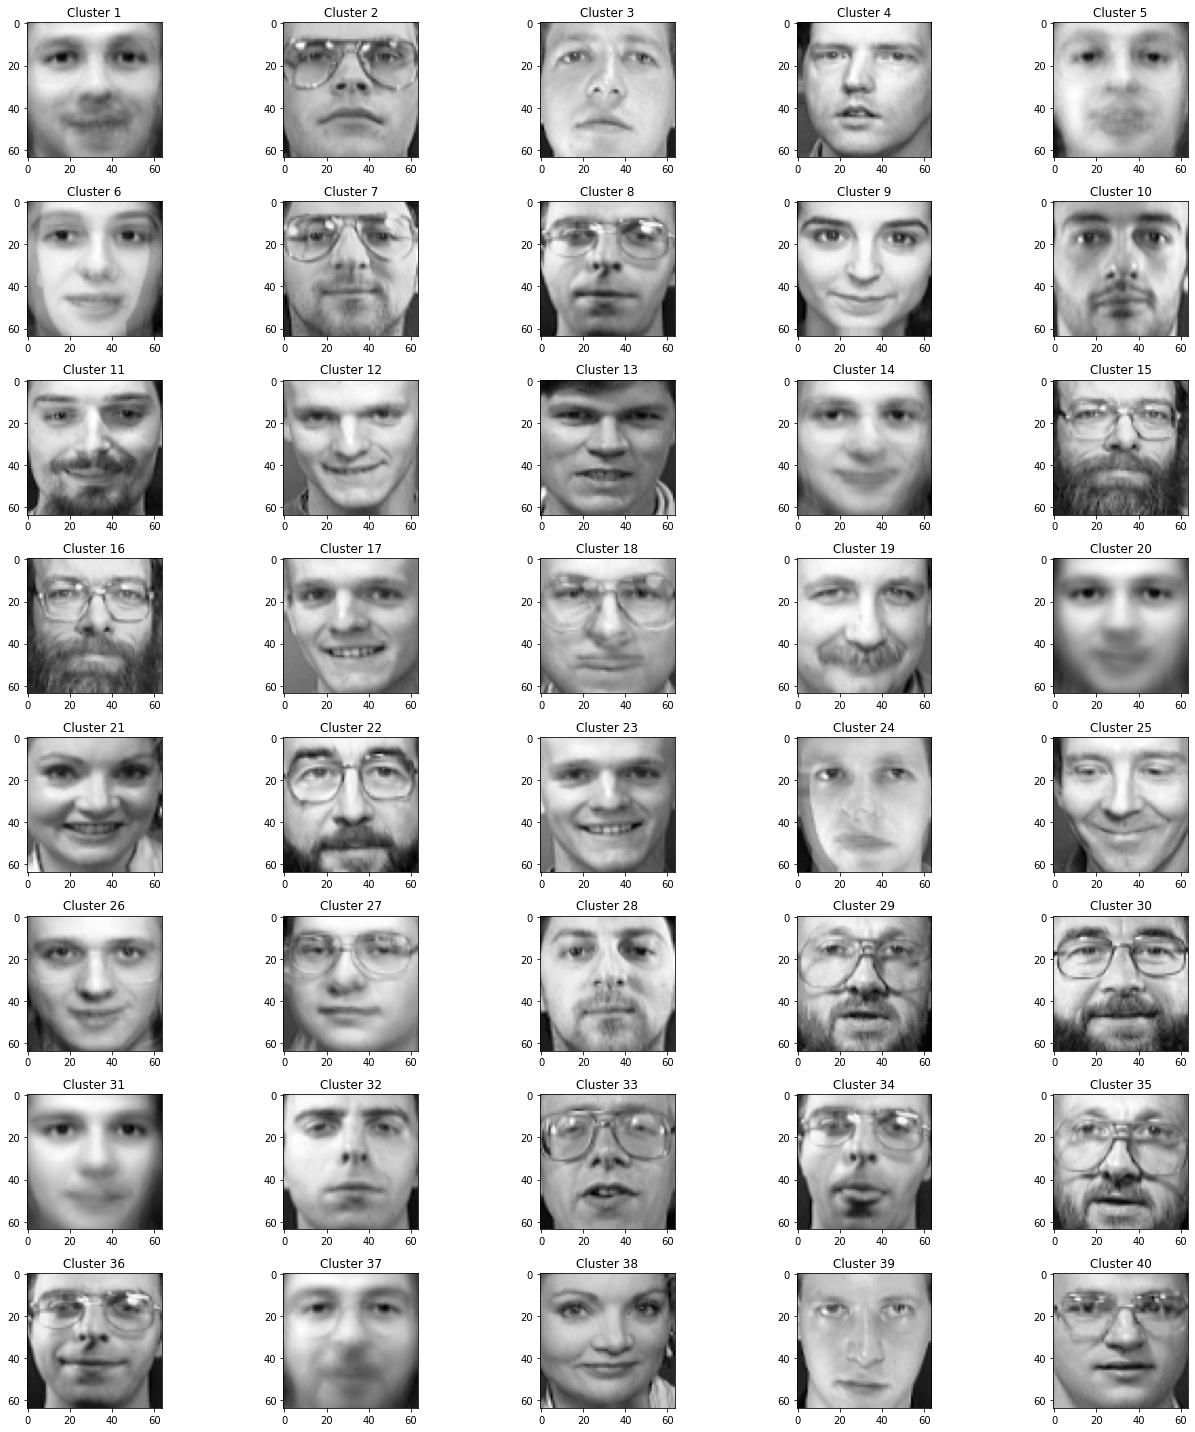

In [ ]:
get_cluster_plot(Kmus_40)

## Part 2: Principle Component Analysis 

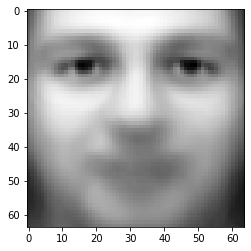

In [ ]:
mean_face = np.mean(faces, axis=1)[:,None]
viewcolumn(mean_face)

In [ ]:
A = faces - mean_face
A

array([[-21.8325,  13.1675, -19.8325, ...,  24.1675, -44.8325,  28.1675],
       [-15.34  ,   9.66  , -23.34  , ...,  20.66  , -49.34  ,  26.66  ],
       [-16.8825,  20.1175, -34.8825, ...,  13.1175, -48.8825,  25.1175],
       ...,
       [-31.2575, -38.2575, -36.2575, ..., -32.2575,  69.7425,  22.7425],
       [-34.8   , -41.8   , -36.8   , ..., -29.8   ,  69.2   ,  16.2   ],
       [-37.13  , -38.13  , -38.13  , ..., -29.13  ,  70.87  ,  17.87  ]])

In [ ]:
eigvals, V = la.eig(A.T @ A)
eigvals.shape, V.shape

((400,), (400, 400))

In [ ]:
V_sort, D_sort = eigsort(V, eigvals)

In [ ]:
def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

In [ ]:
U = A @ V
U = normc(U)
U

array([[-0.0041911 ,  0.02859139,  0.00135691, ..., -0.00745984,
        -0.00212228,  0.01591554],
       [-0.00454849,  0.02970844, -0.00137597, ...,  0.00724232,
        -0.02171574,  0.02120619],
       [-0.00504107,  0.03133229, -0.0050605 , ..., -0.00521853,
        -0.01440886,  0.01089346],
       ...,
       [ 0.00097803, -0.02413049, -0.01308033, ..., -0.01927607,
         0.00131382, -0.01309582],
       [ 0.0024609 , -0.0246791 , -0.0132958 , ..., -0.03411206,
        -0.00783363, -0.00378316],
       [ 0.00318826, -0.02488899, -0.01188341, ..., -0.01021639,
        -0.00991323,  0.02635732]])

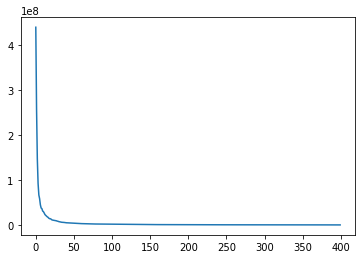

In [ ]:
plt.plot(range(len(D_sort)),D_sort.diagonal())

In [ ]:
c = U.T @ (faces - mean_face)
Z_face = U @ c + mean_face
# viewcolumn(Z_face)
Z_face.shape

(4096, 400)

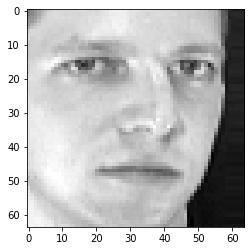

In [ ]:
viewcolumn(faces[:,1])

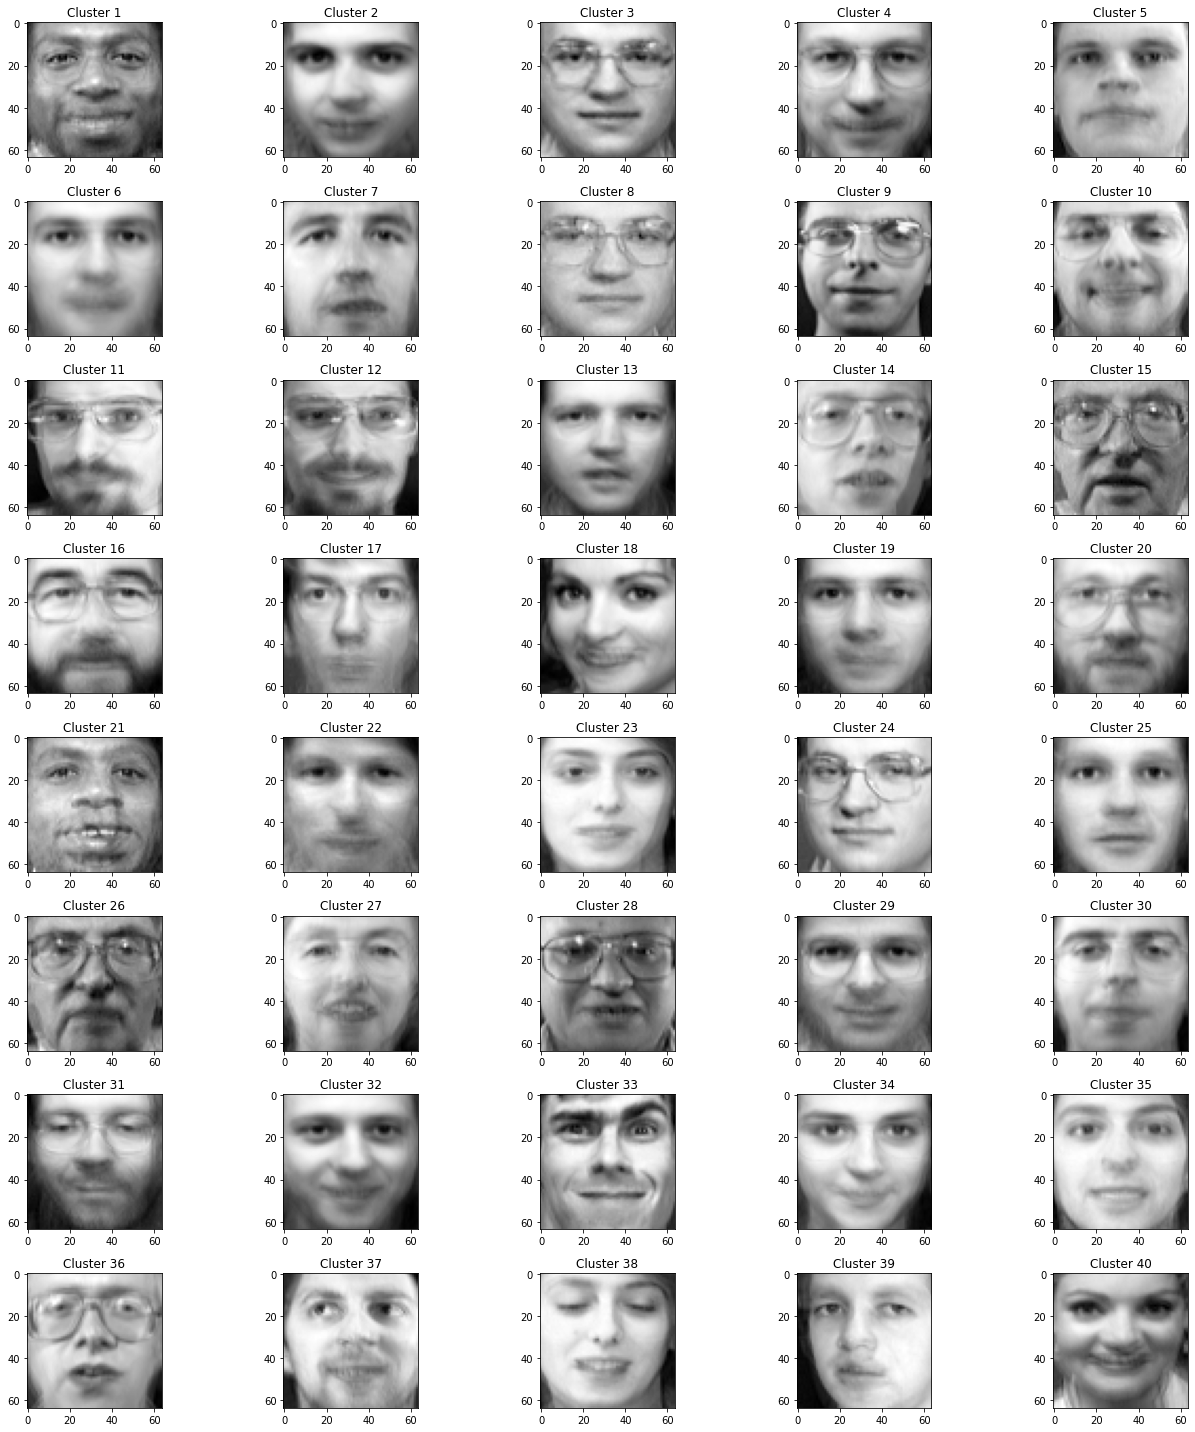

In [ ]:
Z_Kmus_40 = runKMeans(40,Z_face.T)
get_cluster_plot(Z_Kmus_40)

In [ ]:
z_10 = U[:,:10] @ c[:10] + mean_face
z_10.shape, z_10

((4096, 400),
 array([[ 71.8959374 , 166.87547752,  79.24571485, ..., 120.47635831,
          39.7082523 , 105.81734963],
        [ 74.09286304, 169.123302  ,  81.6288401 , ..., 121.19471234,
          40.66473025, 103.20598935],
        [ 77.98944399, 170.8957412 ,  84.89626997, ..., 121.74150113,
          40.43138012, 101.37815208],
        ...,
        [ 38.02841668,  41.08565218,  17.34391489, ...,  54.15702722,
         121.79794485,  94.43426871],
        [ 40.65018238,  45.82390591,  21.21458602, ...,  57.30522179,
         122.47228684,  94.82212885],
        [ 41.18055986,  48.62307606,  22.65700148, ...,  59.85892277,
         120.62947656,  95.59151608]]))

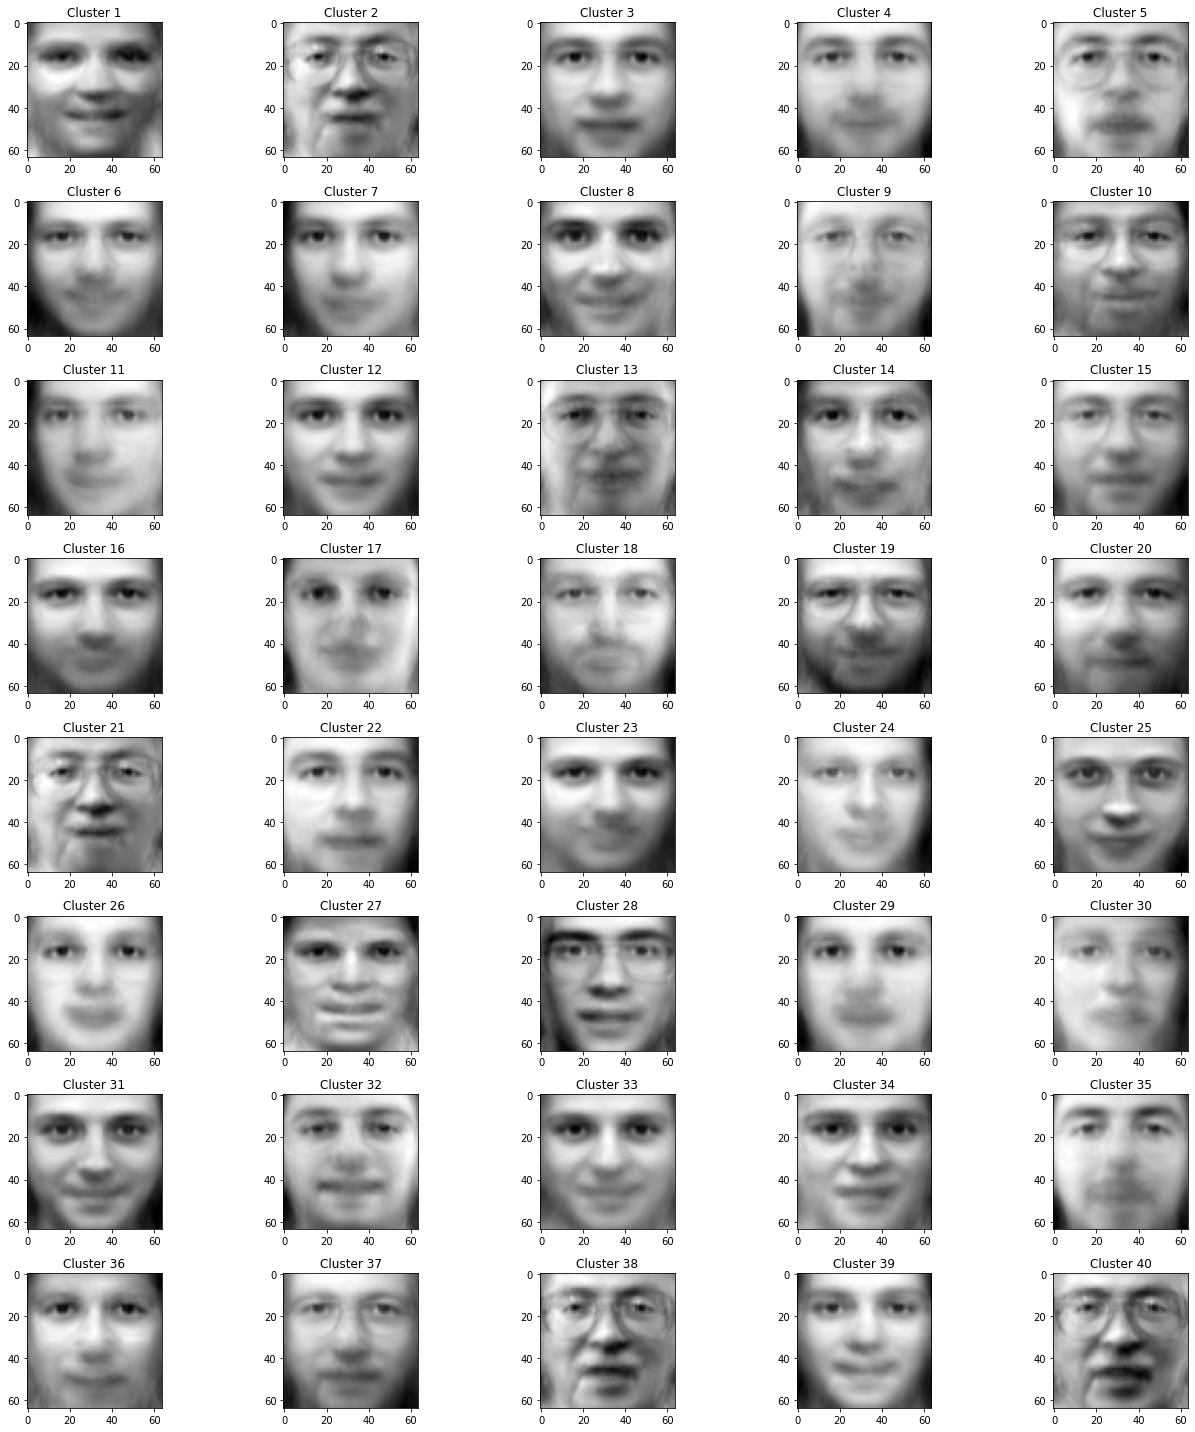

In [ ]:
Z_Kmus_10 = runKMeans(40,z_10.T)
get_cluster_plot(Z_Kmus_10)

In [ ]:
z_200 = U[:,:200] @ c[:200] + mean_face
z_200.shape, z_200

((4096, 400),
 array([[ 81.84741101, 120.78087032,  81.27398932, ..., 130.17862207,
          58.5382588 , 125.88822163],
        [ 82.68221577, 116.90578202,  79.99749454, ..., 126.74484763,
          54.73083151, 123.5805451 ],
        [ 83.76074253, 124.28320427,  68.93465433, ..., 119.64150661,
          51.99215531, 120.11570704],
        ...,
        [ 45.07038092,  38.24170623,  36.17273182, ...,  40.13511193,
         131.89504164,  88.90345764],
        [ 44.22035397,  34.62828172,  36.17183158, ...,  44.25299001,
         132.90545613,  91.25170985],
        [ 42.87308962,  39.91581239,  32.67307311, ...,  48.45191441,
         144.16723585,  91.50615677]]))

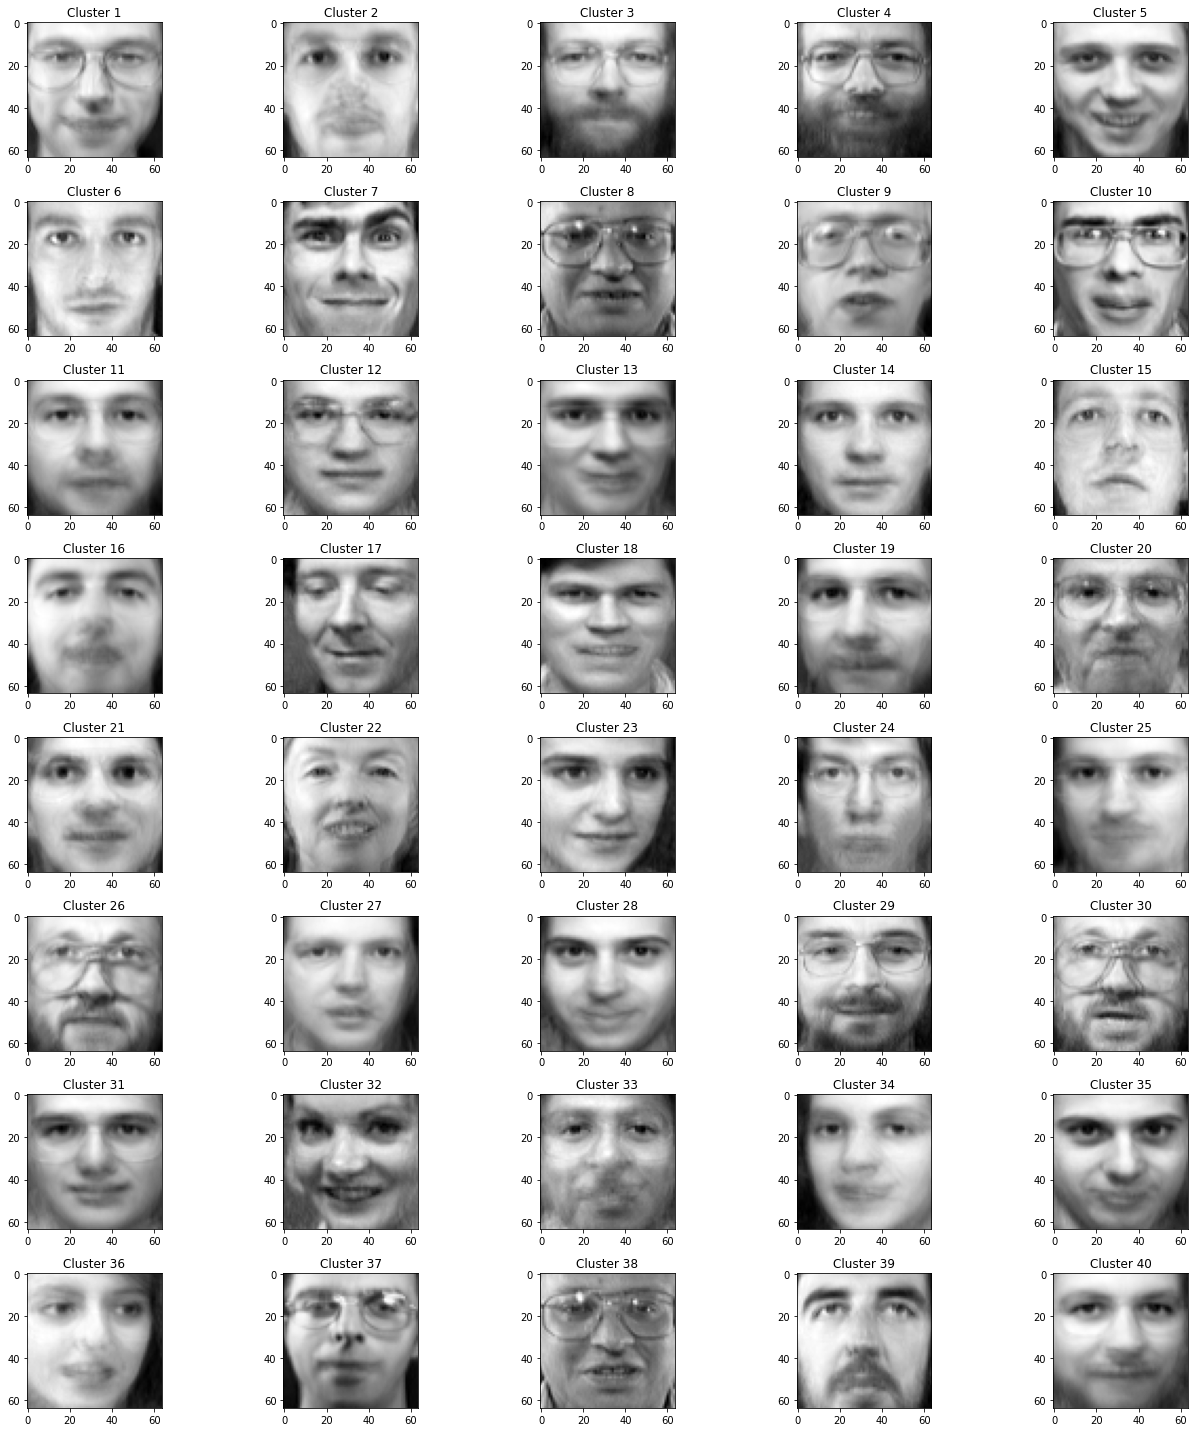

In [ ]:
Z_Kmus_200 = runKMeans(40,z_200.T)
get_cluster_plot(Z_Kmus_200)